# Зачем это все

1. **Хотим, чтобы машины работали вместо нас**  
    **Машины уже и так много делают за нас**
 * Собирают машины
<img src="pics/robot_auto.jpg" style="width: 400px;"/>
 * производят ткани
<img src="pics/robot_fiber.jpg" style="width: 400px;"/>
 * Что еще?   
 
    **Машины могут делать еще больше**
 * пилотировать автомобиль
 * рассказывать, что они видят (что может помочь, например, слабовидящим)
 * помочь клиенту решить проблему в колл-центре
 * выбрать релевантные резюме из очень большого списка кандидатов
 * ваши варианты?
 
 
2. **Хотим предсказывать будущее**
  * хотим знать курс валют и стоимость акций завтра
  * хотим знать, вернет ли клиент кредит
  * хотим знать, какой товар понадобится человеку завтра
  * хотим поймать момент, когда игрок уйдет насовсем из нашей MMORPG
  * ваши варианты?

# Первое, что приходит в голову - написать много правил
Какой сложности будет программа, описывающая все правила русского языка? Можно ли написать такую программу? Сколько займет времени её модификация?  
А программа для автоматического перевода с любого языка на любой язык?


# Машинное обучение
1. Machine Learning is the science (and art) of programming computers so they can learn from data.
2. [Machine Learning is the] field of study that gives computers the ability to learn without being explicitly programmed. —Arthur Samuel, 1959
3. A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E. —Tom Mitchell, 1997

### Задачи машинного обучения


# Supervised learning \ Обучение с учителем
В данных известен ответ, класс или число

## Классификация
В данных известен класс. Для новых данных нужно определить, к каким классам они относятся


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  

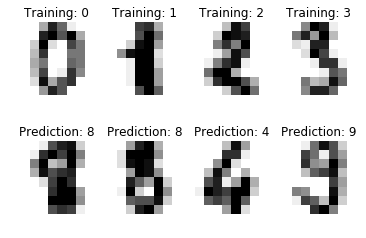

In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:int(n_samples / 2)], digits.target[:int(n_samples / 2)])

# Now predict the value of the digit on the second half:
expected = digits.target[int(n_samples / 2):]
predicted = classifier.predict(data[int(n_samples / 2):])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[int(n_samples / 2):], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()


## Регрессия
В данных известена некоторая числовая величина. Для новых данных нужно определить значение этой величины.

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)
print(boston.feature_names)
print(boston.data.shape)
print(boston.target.shape)
print(boston.data)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

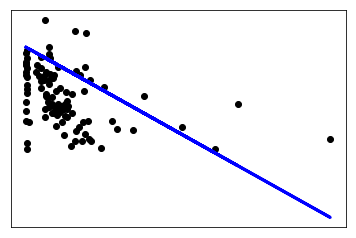

In [4]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Use only one feature
X = boston.data[:, np.newaxis, 0]

# Split the data into training/testing sets
X_train = X[:-100]
X_test = X[-100:]

# Split the targets into training/testing sets
y_train = boston.target[:-100]
y_test = boston.target[-100:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Unsupervised learning \ Обучение без учителя

## Кластеризация
В данных, возможно, есть какая-либо структура. Но нет знания о том, есть ли она и какой формы.

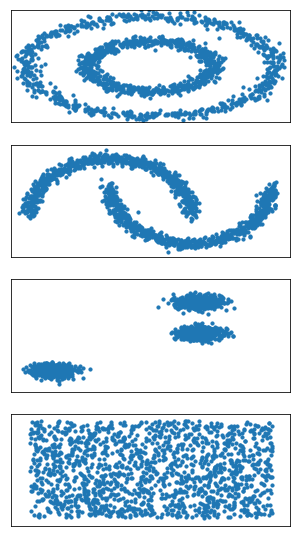

In [5]:
# http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

plt.figure(figsize=(2 + 3, 9.5))

datasets = [noisy_circles, noisy_moons, blobs, no_structure]
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # plot
    plt.subplot(4, 1, i_dataset + 1)
    plt.scatter(X[:, 0], X[:, 1], s=10)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xticks(())
    plt.yticks(())

plt.show()

In [6]:
for i_dataset, dataset in enumerate(datasets):
    print(dataset[0].shape)
    print(dataset)

(1500, 2)
(array([[-0.67799938, -0.69875698],
       [ 0.93143746,  0.19139133],
       [ 0.54829131, -0.00601715],
       ..., 
       [-0.34518816, -0.35804797],
       [ 0.01719727, -0.94513802],
       [ 0.91377877, -0.59884164]]), array([0, 0, 1, ..., 1, 0, 0]))
(1500, 2)
(array([[ 0.49627131, -0.34275349],
       [-0.16629956,  0.92234209],
       [ 0.71895601,  0.66529038],
       ..., 
       [ 1.90950927,  0.02989686],
       [ 0.54623069, -0.36003133],
       [ 0.04090016,  0.37069297]]), array([1, 0, 0, ..., 1, 1, 1]))
(1500, 2)
(array([[  5.86749807,   8.17715188],
       [  5.61369982,   9.93295527],
       [  7.22508428,  10.44886194],
       ..., 
       [  7.73674097,  10.82855388],
       [ -4.61701094,  -9.64855983],
       [ -3.48640175,  -9.25766922]]), array([0, 0, 0, ..., 0, 2, 2]))
(1500, 2)
(array([[ 0.59945663,  0.24694133],
       [ 0.5173267 ,  0.57255303],
       [ 0.55229185,  0.40567924],
       ..., 
       [ 0.8384347 ,  0.52906874],
       [ 0.84228843,

## Выделение шума
Известны очищенные данные. В новых примерах нужно выделить шум.

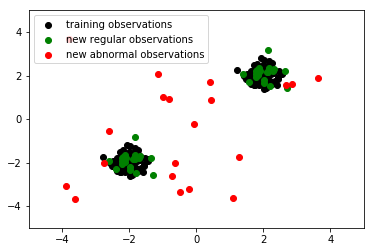

In [7]:
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py

import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='black')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

### Визуализация данных
Найти способ отобразить данные в графическом виде и извлечь из этого знания

Computing t-SNE embedding


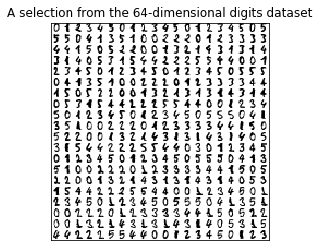

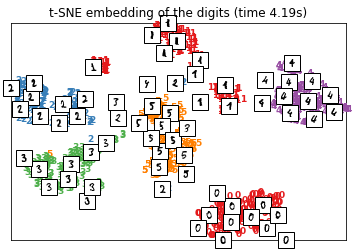

In [8]:
# http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

        
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')


# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()